# **Aim : Image Compression and Decompression using Autoencoder**

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
input_img = Input(shape=(28, 28, 1))

In [ ]:
# Define the encoder layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
# Define the decoder layers
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 86s 174ms/step - loss: 0.2151 - val_loss: 0.1430
Epoch 2/50
469/469 [==============================] - 96s 205ms/step - loss: 0.1320 - val_loss: 0.1232
Epoch 3/50
469/469 [==============================] - 77s 163ms/step - loss: 0.1203 - val_loss: 0.1155
Epoch 4/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1143 - val_loss: 0.1108
Epoch 5/50
469/469 [==============================] - 79s 168ms/step - loss: 0.1104 - val_loss: 0.1075
Epoch 6/50
469/469 [==============================] - 77s 163ms/step - loss: 0.1076 - val_loss: 0.1052
Epoch 7/50
469/469 [==============================] - 77s 164ms/step - loss: 0.1055 - val_loss: 0.1035
Epoch 8/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1039 - val_loss: 0.1026
Epoch 9/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1026 - val_loss: 0.1010
Epoch 10/50
469/469 [==============================] - 77s 163ms/step - l

In [ ]:
encoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [ ]:
encoded_imgs.shape

(10000, 28, 28, 1)

In [ ]:
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 4s 12ms/step


In [ ]:
decoded_imgs.shape

(10000, 28, 28, 1)

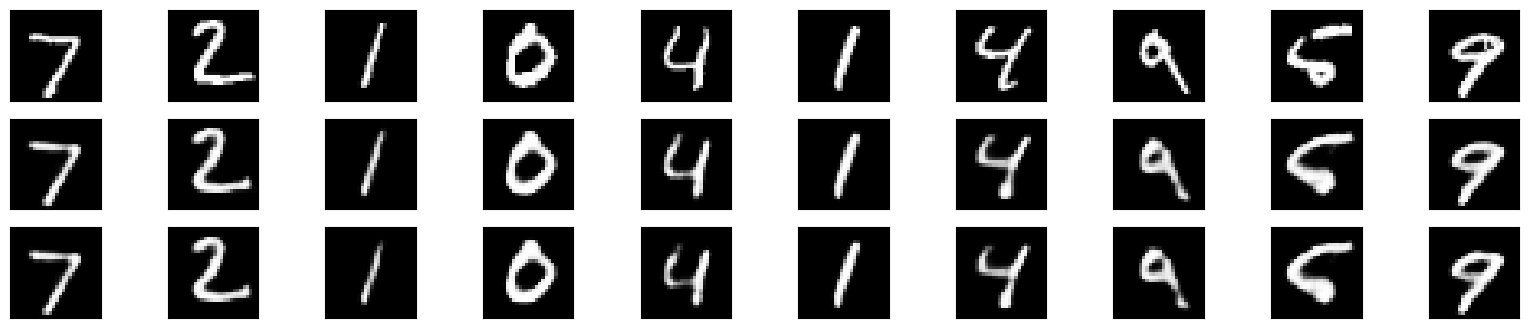

In [ ]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed image
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Decompressed image
    ax = plt.subplot(3, n, i+ 2*n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)